## Composing functions in Scala

In [1]:
// Length function

"codemotion".length

res0: Int = 10

In [2]:
// Is_even function

def is_even(x: Int) = 
    x % 2 == 0

defined function is_even

In [3]:
// Ad-hoc composition

def is_even_length(x: String): Boolean = 
    is_even(x.length)

defined function is_even_length

In [5]:
// `compose` HOF

def compose(g: Int => Boolean, f: String => Int): String => Boolean = 
    (s: String) => g(f(s))

defined function compose

In [6]:
// Modular definition 

def is_even_legnth(x: String): Boolean = 
    compose(is_even, _.length)(x)

defined function is_even_legnth

## Making `compose` generic

In [7]:
// Generic definition of `compose` HOF

def compose[A, B, C](g: B => C, f: A => B): A => C = 
    s => g(f(s))

defined function compose

In [8]:
// It works for several types 

compose[String, Int, Boolean](is_even, _.length)
compose[List[Int], Int, Boolean](is_even, _.size)

res7_0: String => Boolean = ammonite.$sess.cmd6$Helper$$Lambda$1954/0x0000000801518040@f018e92
res7_1: List[Int] => Boolean = ammonite.$sess.cmd6$Helper$$Lambda$1954/0x0000000801518040@4f5a21b1

## Type-driven development

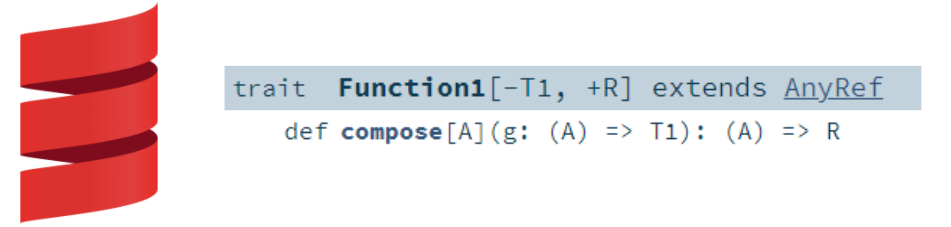

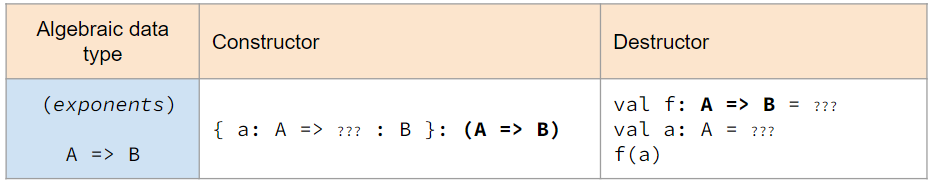

In [9]:
// I won't tell you what I want, just the signature: implement it!

def foo[A, B, C](f: B => C, g: A => B): A => C = 
    (a: A) => f(g(a : A) : B) : C

defined function foo

In [10]:
// Without type annotations

def compose[A, B, C](f: B => C, g: A => B): A => C = 
    a => f(g(a))

defined function compose

## Type-driven development ❤️ logic


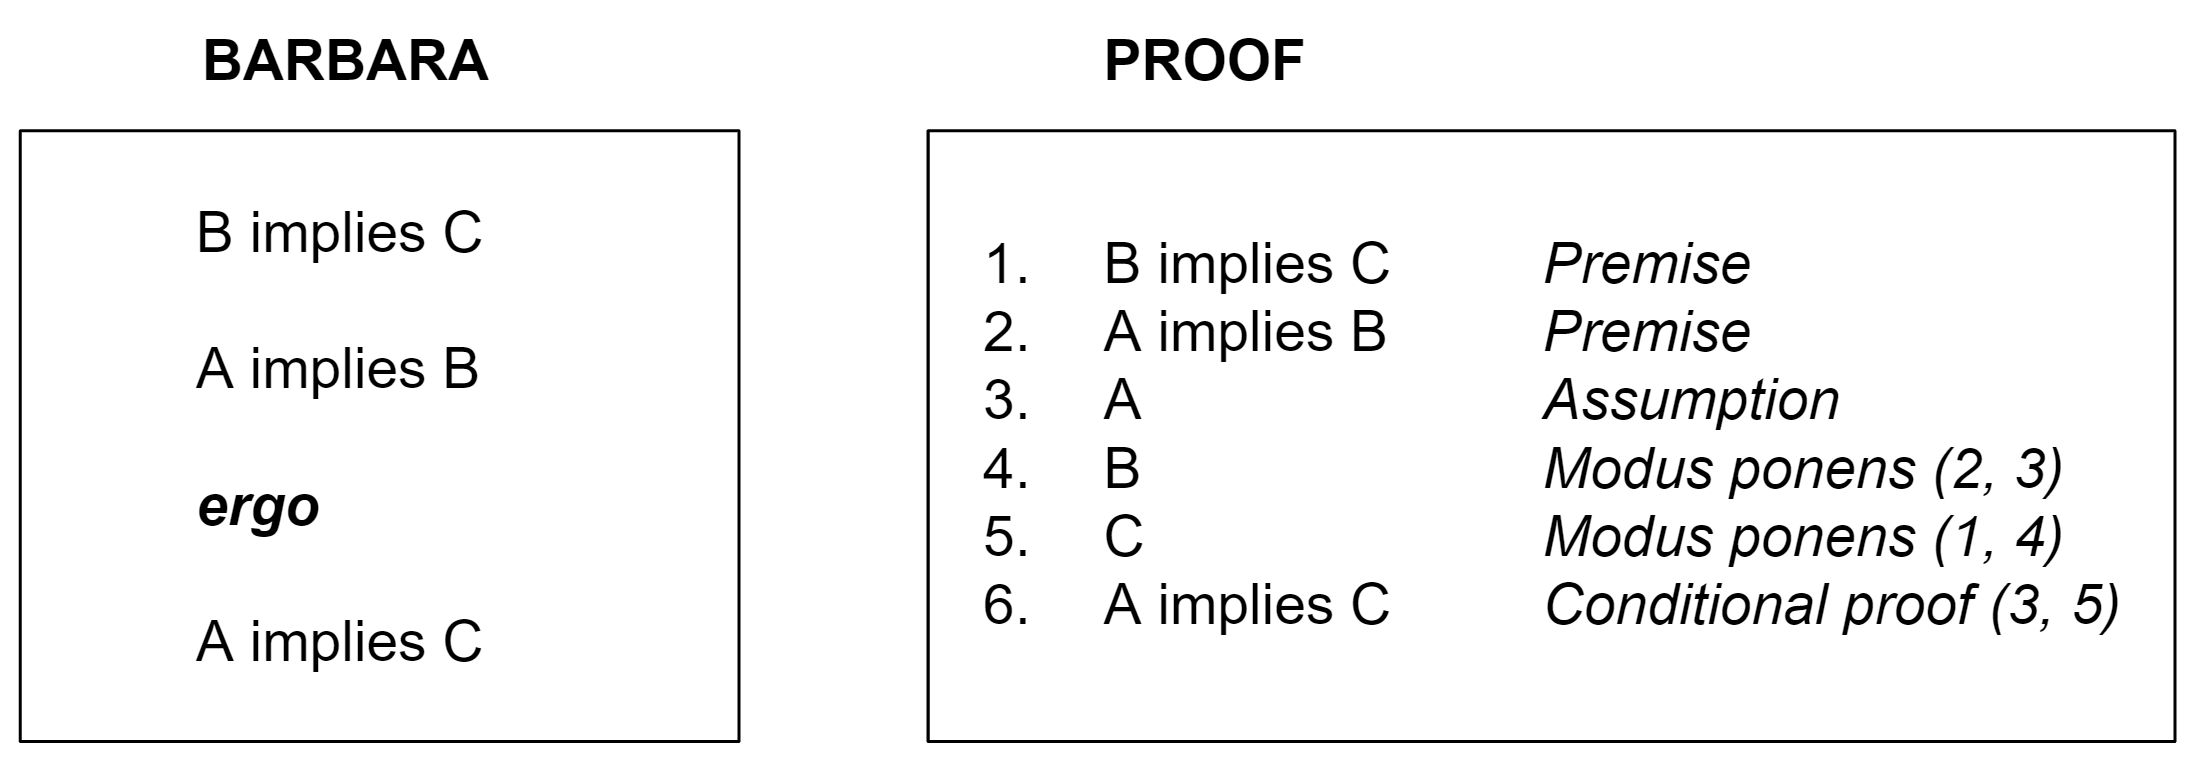

In [11]:
// Refactor the `compose` implementation to match the proof more closely

def barbara[A, B, C](
     `1`: B => C, 
     `2`: A => B): 
          A => C = 
   { `3`: A => 
        val `4`: B = `2`(`3`)
        `1`(`4`) : C
   }: (A => C) 

defined function barbara

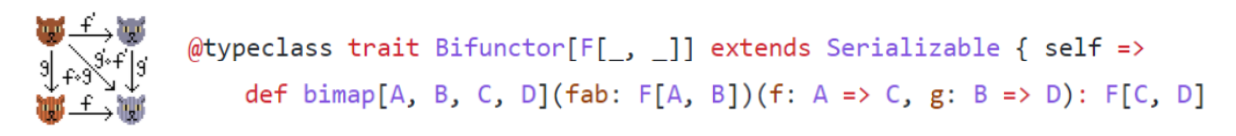

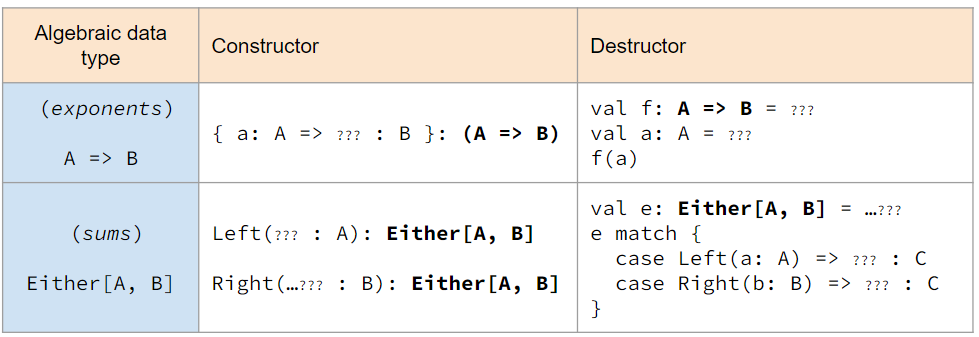

In [ ]:
def bimap[A, B, C, D](e: Either[A, B])(f: A => C, g: B => D): Either[C, D] = 
    e match {
        case Left(a: A) => 
            Left(f(a : A) : C): Either[C, D]
        case Right(b: B) => 
            Right(g(b: B) : D): Either[C, D]
    }

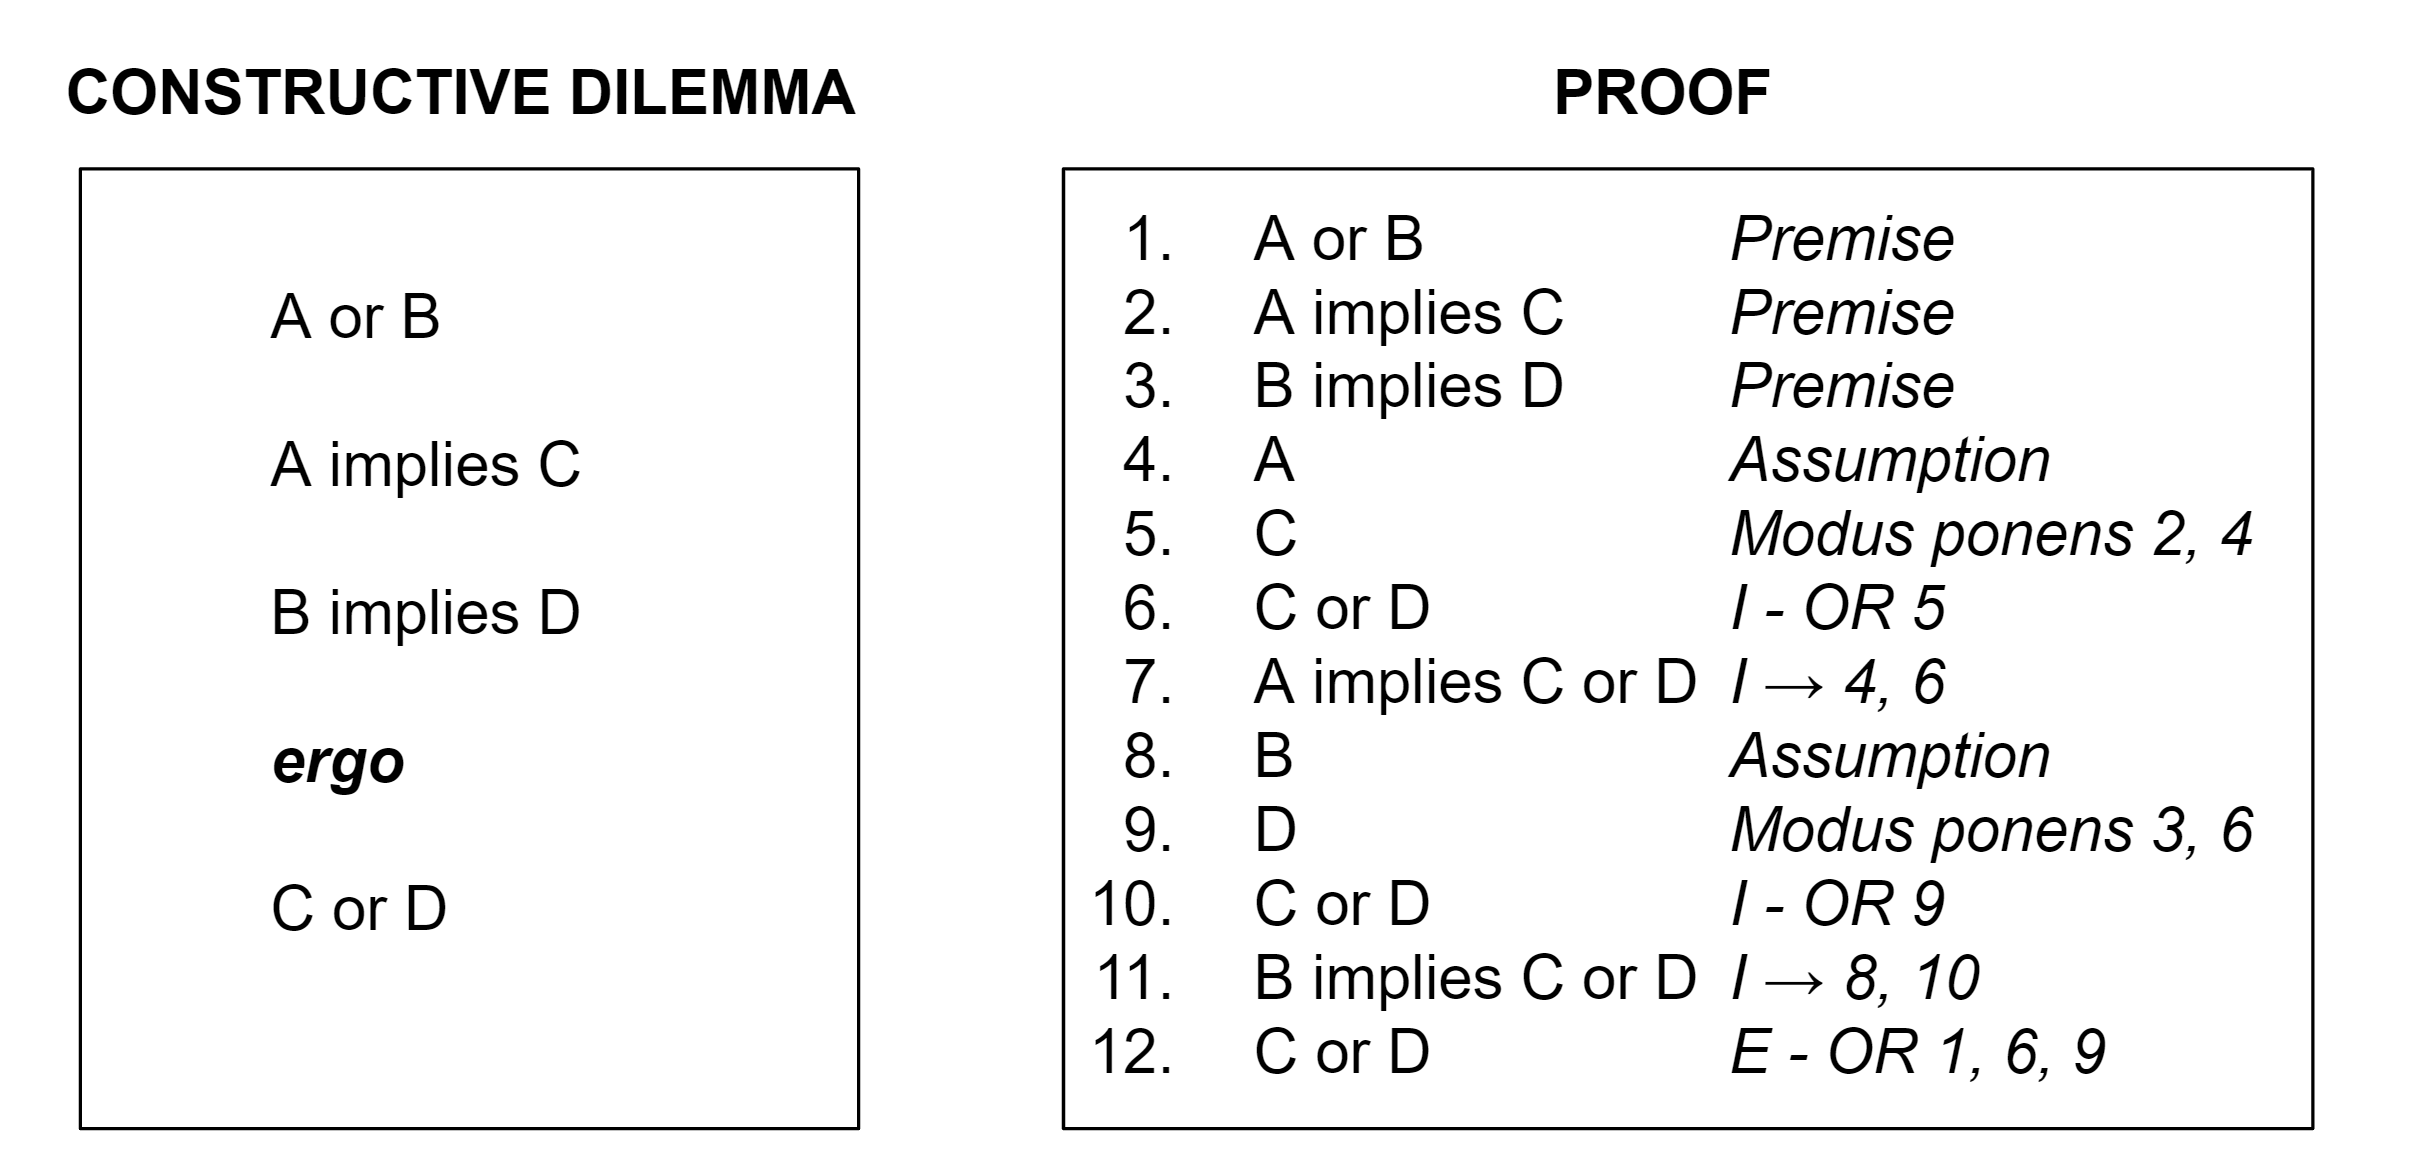

In [ ]:
def constructive_dilemma[A, B, C, D](
        _1: Either[A, B])(
        _2: A => C, 
        _3: B => D): Either[C, D] = 
    (_1 match {
        case Left(_4 : A) => 
            val _5: C = _2(_4)
            Left(_5): Either[C, D]
        case Right(_7 : B) => 
            val _8: D = _3(_7)
            Right(_8 : D): Either[C, D]
    }) : Either[C, D]

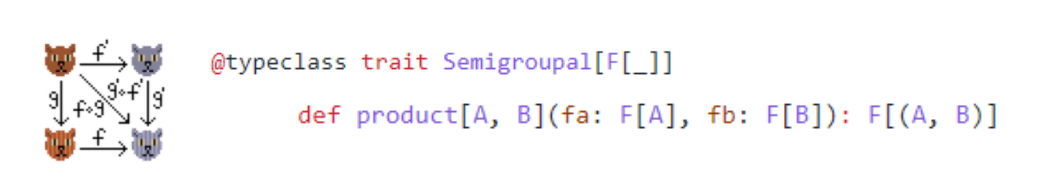

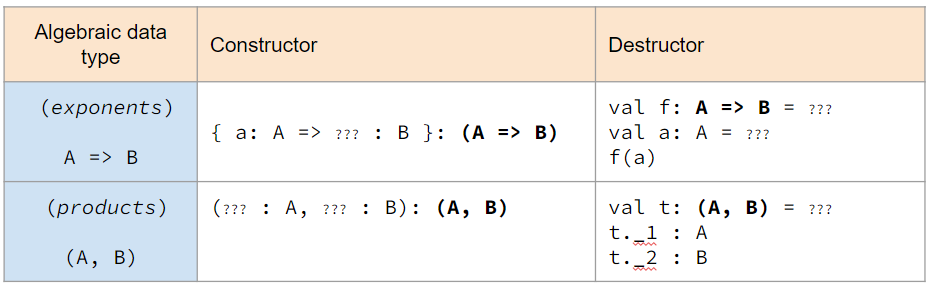

In [ ]:
def product[A, B, C](f: A => B, g: A => C): A => (B, C) = 
    (a: A) => (f(a), g(a))

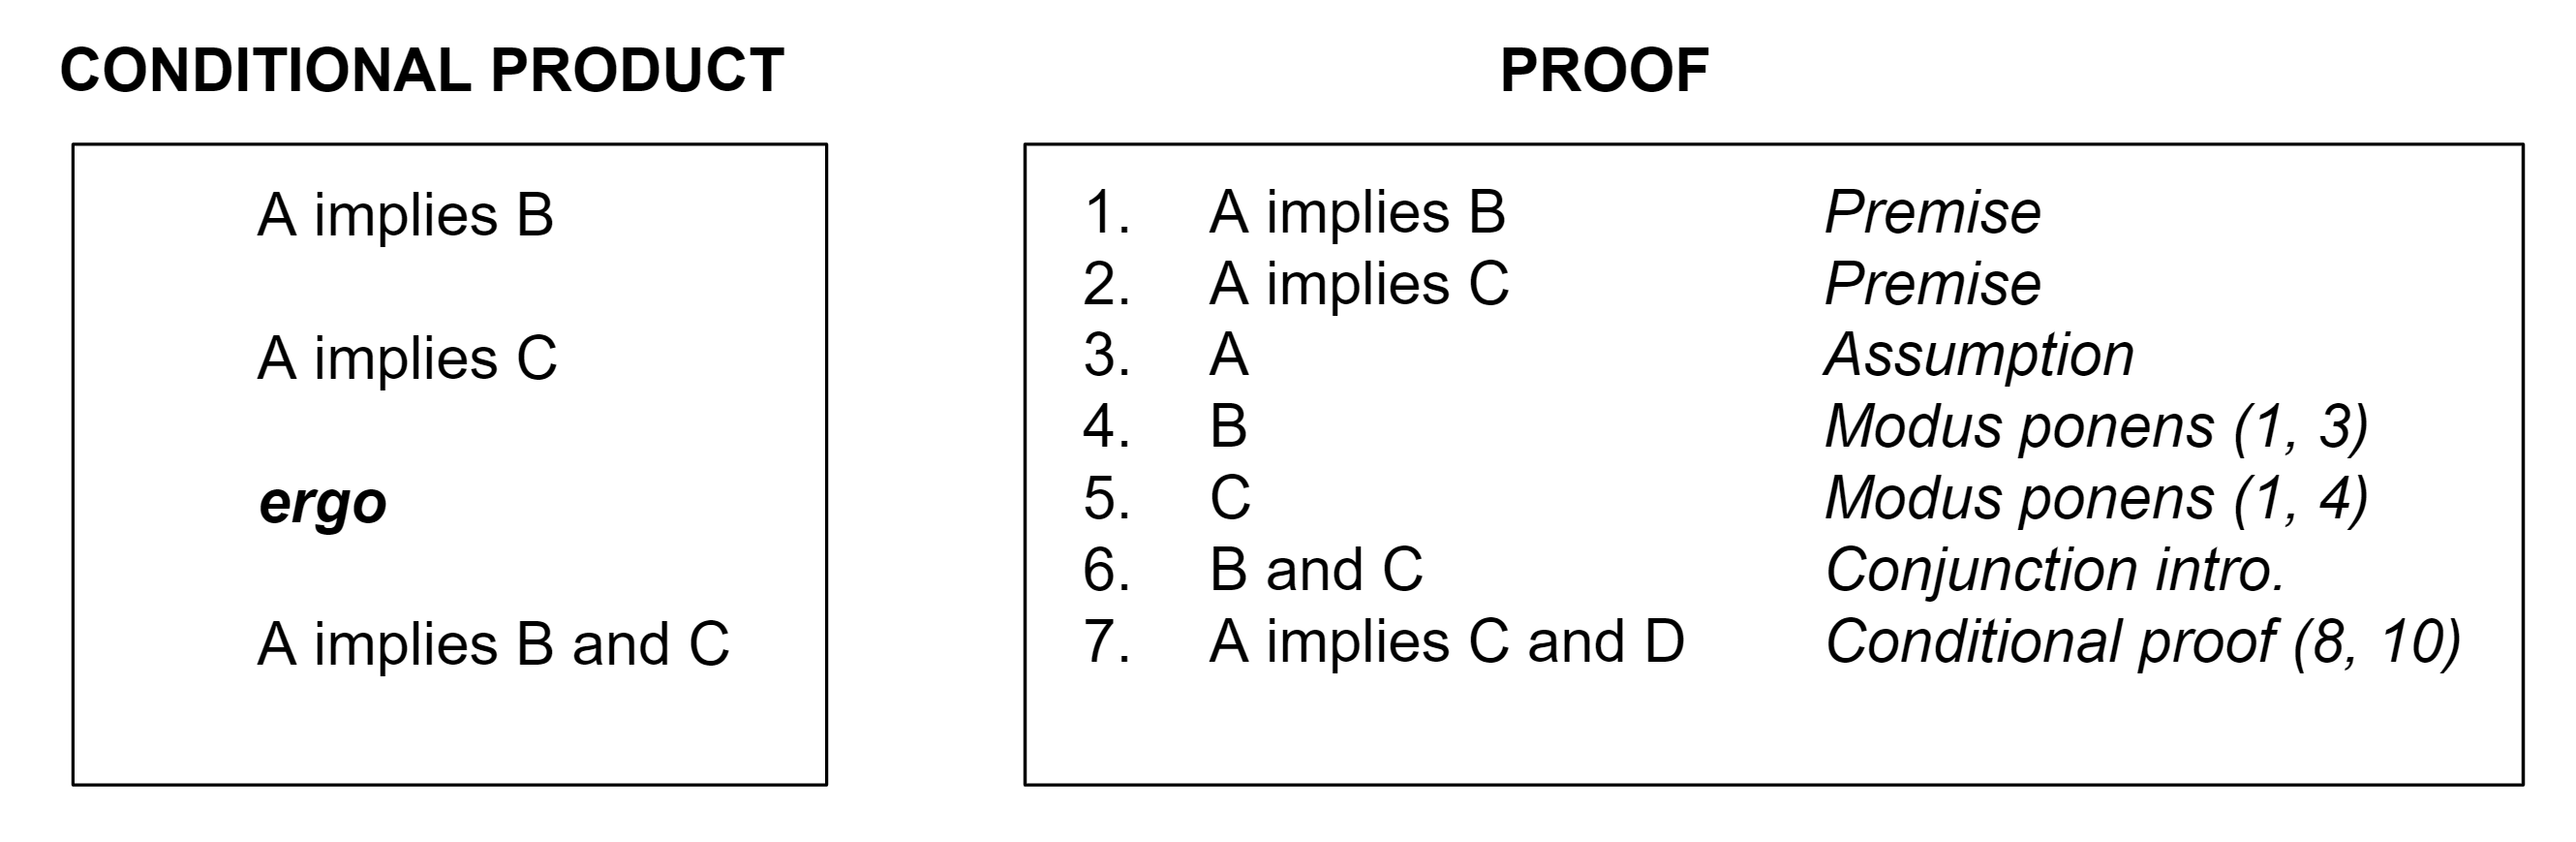

In [ ]:
def conditional_product[A, B, C](
    f: A => B, 
    g: A => C): 
       A => (B, C) = 
  { a: A => 
      val b: B = f(a)
      val c: C = g(a)
      (b, c) : (B, C)
  } : (A => (B, C))